<a href="https://colab.research.google.com/github/RohanTakey/CNN-Image-Classification-Cifer10/blob/main/cifer10_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN ( Cifer10 image Classification)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import CNN libraries
from keras.models import Sequential
from keras.layers import Convolution2D , MaxPooling2D, Flatten , Dense , Dropout,BatchNormalization
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loadinng dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


170508288/170498071 [==============================] - 2s 0us/step


In [3]:
# Checking data size
print('Train Images shape :',train_images.shape)
print('Train Labels shape :',train_labels.shape)
print('Test Images shape :',test_images.shape)
print('Test Labels shape :',test_labels.shape)

Train Images shape : (50000, 32, 32, 3)
Train Labels shape : (50000, 1)
Test Images shape : (10000, 32, 32, 3)
Test Labels shape : (10000, 1)


In [4]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#### What Label is denoted as follows :
    0: airplane
    1: automobile
    2: bird
    3: cat
    4: deer
    5: dog
    6: frog
    7: horse
    8: ship
    9: truck

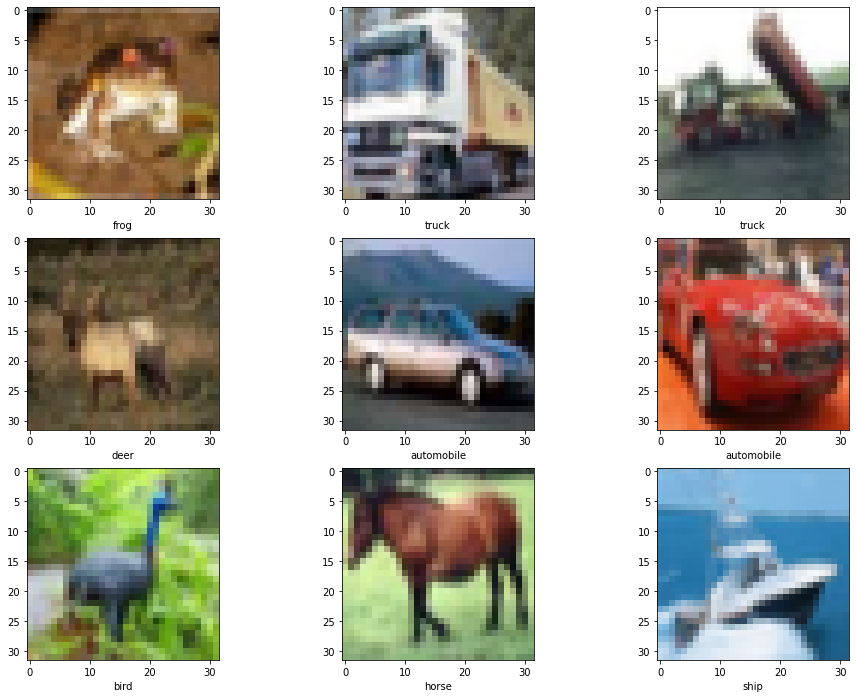

In [5]:
# Sampleof given image data :
labels=['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(16,12))
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.grid(False)
	plt.imshow(train_images[i])
	
	plt.xlabel(labels[train_labels[i][0]])
plt.show()

### data Preprocessing:

- The images in array format needs to be converted in float and then standerdize in values between 0 and 1.
- To standerdize the values it divded by maximum pixel size (255).

In [6]:
# converting data as float :
train_images = train_images.astype('float32')
test_images = test_images.astype('float32') 


# Standardizing in 0 to 1 :
train_images = train_images / 255
test_images = test_images / 255 

# Converting target data to categorical data:
# method 1 -Using one hot uncoding
# method 2- Using Keras.utils as to categorical feature. 
categoris=10 # The no of catgories we had
train_y=to_categorical(train_labels,categoris)
test_y=to_categorical(test_labels,categoris)

###  CNN model Building using Keras

In [7]:
# Intializing classifier
classifier=Sequential(name='CIFAR10')
bit_depth=3 # as color images in the data

# Convolution 2D parameters:
# 1) number of filters
# 2) stride size
# 3) image size
classifier.add(Convolution2D(32,(3,3),input_shape=(32,32,bit_depth),activation='relu'))
# Normalization Layer for Batch at every layer
classifier.add(BatchNormalization())
classifier.add(Convolution2D(32,(3,3),activation='relu'))
classifier.add(BatchNormalization())
#maxpooling layer
classifier.add(MaxPooling2D(pool_size=(2,2)))



classifier.add(Convolution2D(64,(3,3),activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Convolution2D(64,(3,3),activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2,2)))



classifier.add(Convolution2D(128,(3,3),activation='relu'))
classifier.add(BatchNormalization())
classifier.add(Convolution2D(128,(3,3),activation='relu'))


# An Dropout layer
classifier.add(Dropout(0.5))


# Adding ANN Over CNN Layers
# Flatten layers
classifier.add(Flatten())
# Fully connected layers
# Hidden layer 1: nodes=64
classifier.add(Dense(units=pow(2,6),activation='relu'))
classifier.add(BatchNormalization())

# Hidden layer 2: nodes=32
classifier.add(Dense(units=pow(2,5),activation='relu'))
classifier.add(BatchNormalization())

# Hidden layer 3: nodes=16
classifier.add(Dense(units=pow(2,4),activation='relu'))
# Dropout layer
classifier.add(Dropout(0.2))
# output layer : nodes=10
classifier.add(Dense(units=10,activation='softmax'))

# Model Summary
classifier.summary()

Model: "CIFAR10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                           

In [8]:
# Compile the model
opt=SGD(lr=0.01)
#classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
classifier.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

### Fitting Model

In [9]:
epoch=100
history = classifier.fit(train_images, train_y, batch_size=64, epochs=epoch,validation_data=(test_images, test_y))

Epoch 1/100
782/782 [==============================] - 21s 9ms/step - loss: 2.1052 - accuracy: 0.2408 - val_loss: 1.8878 - val_accuracy: 0.3157
Epoch 2/100
782/782 [==============================] - 7s 9ms/step - loss: 1.7188 - accuracy: 0.3668 - val_loss: 1.7667 - val_accuracy: 0.3861
Epoch 3/100
782/782 [==============================] - 7s 9ms/step - loss: 1.5294 - accuracy: 0.4462 - val_loss: 1.3989 - val_accuracy: 0.4978
Epoch 4/100
782/782 [==============================] - 7s 8ms/step - loss: 1.4049 - accuracy: 0.4990 - val_loss: 1.6480 - val_accuracy: 0.4274
Epoch 5/100
782/782 [==============================] - 7s 8ms/step - loss: 1.3051 - accuracy: 0.5407 - val_loss: 1.3524 - val_accuracy: 0.5317
Epoch 6/100
782/782 [==============================] - 8s 10ms/step - loss: 1.2280 - accuracy: 0.5726 - val_loss: 1.1847 - val_accuracy: 0.5936
Epoch 7/100
782/782 [==============================] - 7s 9ms/step - loss: 1.1579 - accuracy: 0.5966 - val_loss: 1.3696 - val_accuracy: 0.54

Text(0.5, 1.0, 'Loss Curves')

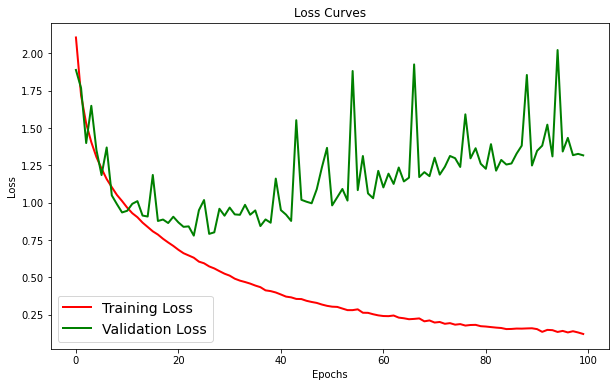

In [10]:
# Loss curve
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], 'red', linewidth=2.0,)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

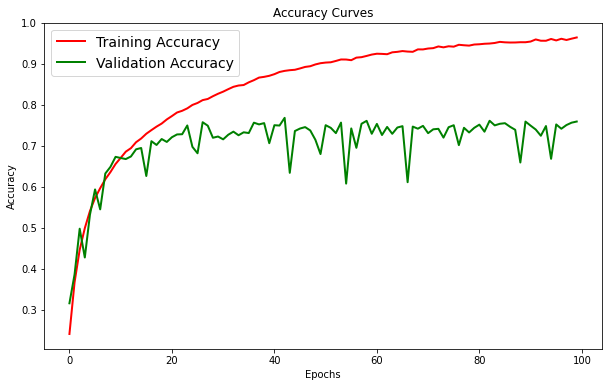

In [11]:
# Accuracy curve
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], 'red', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'green', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

### Predicting Images

In [12]:
pred = classifier.predict(test_images)

# converting the predictions :
pred_labels = np.argmax(pred, axis=1)
print(pred_labels)

[3 8 8 ... 5 1 7]


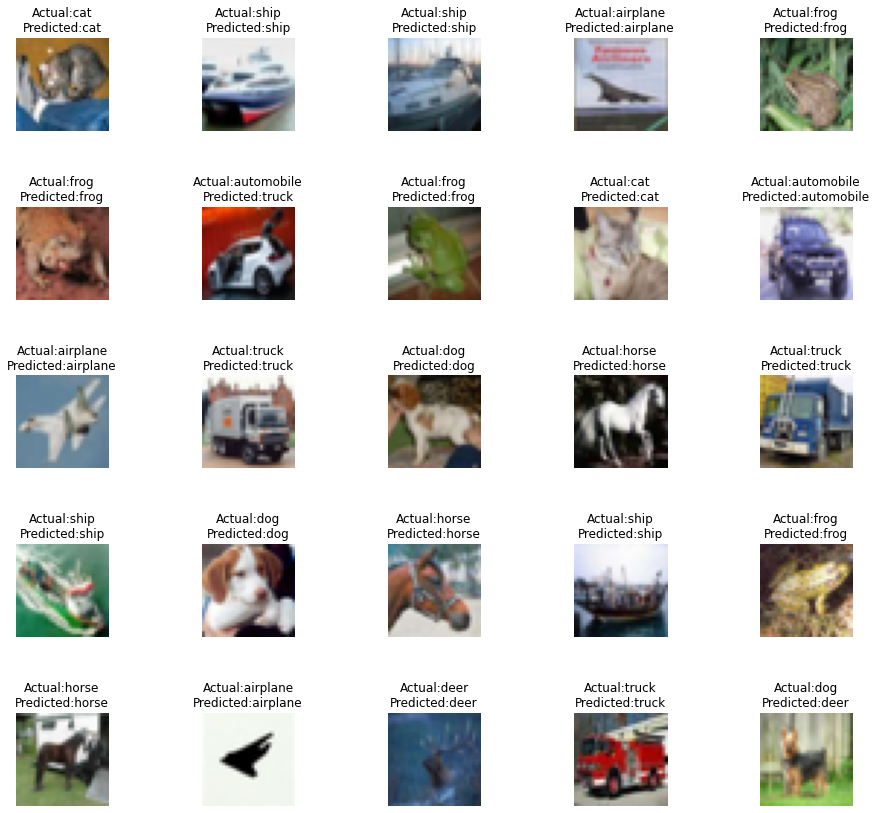

In [13]:
# visualizing  the Actual vs. Predicted Images

fig,axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0,25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("Actual:{}\nPredicted:{}".format(labels[np.argmax(test_y[i])],labels[pred_labels[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)



In [14]:
testdata=(test_labels.ravel()).tolist()

In [15]:
actual=[]
for i in range(len(testdata)):
  label=labels[testdata[i]]
  actual.append(label)

In [16]:
predictions=[]
for i in range(len(testdata)):
  label=labels[pred_labels[i]]
  predictions.append(label)

In [17]:
results=pd.DataFrame({'Actual':actual,'Predictions':predictions})

In [18]:
results

,Actual,Predictions
0,cat,cat
1,ship,ship
2,ship,ship
3,airplane,airplane
4,frog,frog
...,...,...
9995,ship,cat
9996,cat,dog
9997,dog,dog
9998,automobile,automobile
